In [1]:
%matplotlib inline


# Masking the solar disk


This example shows how to mask off emission from the disk.



In [2]:
from __future__ import print_function, division

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

import astropy.units as u

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

We first create the Map using the sample data.



In [3]:
aia = sunpy.map.Map(AIA_171_IMAGE)

Next we build two arrays which include all of the x and y pixel indices.
We must not forget to add the correct units because we will next pass
into a SunPy function which all require them.



In [4]:
x, y = np.meshgrid(*[np.arange(v.value) for v in aia.dimensions]) * u.pixel

Now we can convert this to helioprojective coordinates and create a new
array which contains the normalized radial position for each pixel



In [5]:
hpc_coords = aia.pixel_to_data(x, y)
r = np.sqrt(hpc_coords.Tx ** 2 + hpc_coords.Ty ** 2) / aia.rsun_obs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SunpyDeprecationWarning: The pixel_to_data function is deprecated and may be removed in a future version.
        Use sunpy.map.GenericMap.pixel_to_world instead.
  """Entry point for launching an IPython kernel.


Finally, we create a mask where all values which are less then Rsun are
masked. We also make a slight change to the colormap so that masked values
are shown as black instead of the default white.



In [6]:
mask = ma.masked_less_equal(r, 1)
palette = aia.plot_settings['cmap']
palette.set_bad('black')

Now we create a new custom aia with our new mask and
plot the result using our modified colormap



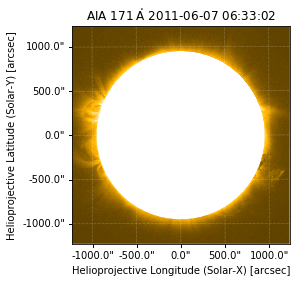

In [7]:
scaled_map = sunpy.map.Map(aia.data, aia.meta, mask=mask.mask)

fig = plt.figure()
plt.subplot(projection=scaled_map)
scaled_map.plot(cmap=palette)
scaled_map.draw_limb()
plt.show()